In [66]:
'''
DT의 장단
장점
1. 근거가 명확함.
2. 변수의 importance를 정확한 수치로 파악할 수 있다.
단점
1. 질문이 항상 랜덤 -> 매번 결과가 다름
2. 질문이 많아지면 overfitting

node가 클수록 정확도 향상, 계산속도저하, overfitting
node가 작을수록 정확도 낮음, underfitting
'''

'\nnode가 클수록 정확도 향상, 계산속도저하, overfitting\nnode가 작을수록 정확도 낮음, underfitting\n'

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [68]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower']=iris.target # IRIS setosa, virginica versicolor
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [69]:
np.unique(df['flower']) # IRIS setosa, virginica versicolor

array([0, 1, 2])

In [70]:
input=iris.data
output=df['flower']

In [71]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output=train_test_split(input,output)

In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
DT=DecisionTreeClassifier(max_depth=3)

In [73]:
DT.fit(train_input,train_output)

DecisionTreeClassifier(max_depth=3)

In [74]:
DT.score(test_input,test_output)

0.9210526315789473

[Text(0.375, 0.875, 'petal width (cm) <= 0.75\ngini = 0.666\nsamples = 112\nvalue = [40, 37, 35]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 72\nvalue = [0, 37, 35]'),
 Text(0.25, 0.375, 'petal length (cm) <= 5.35\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

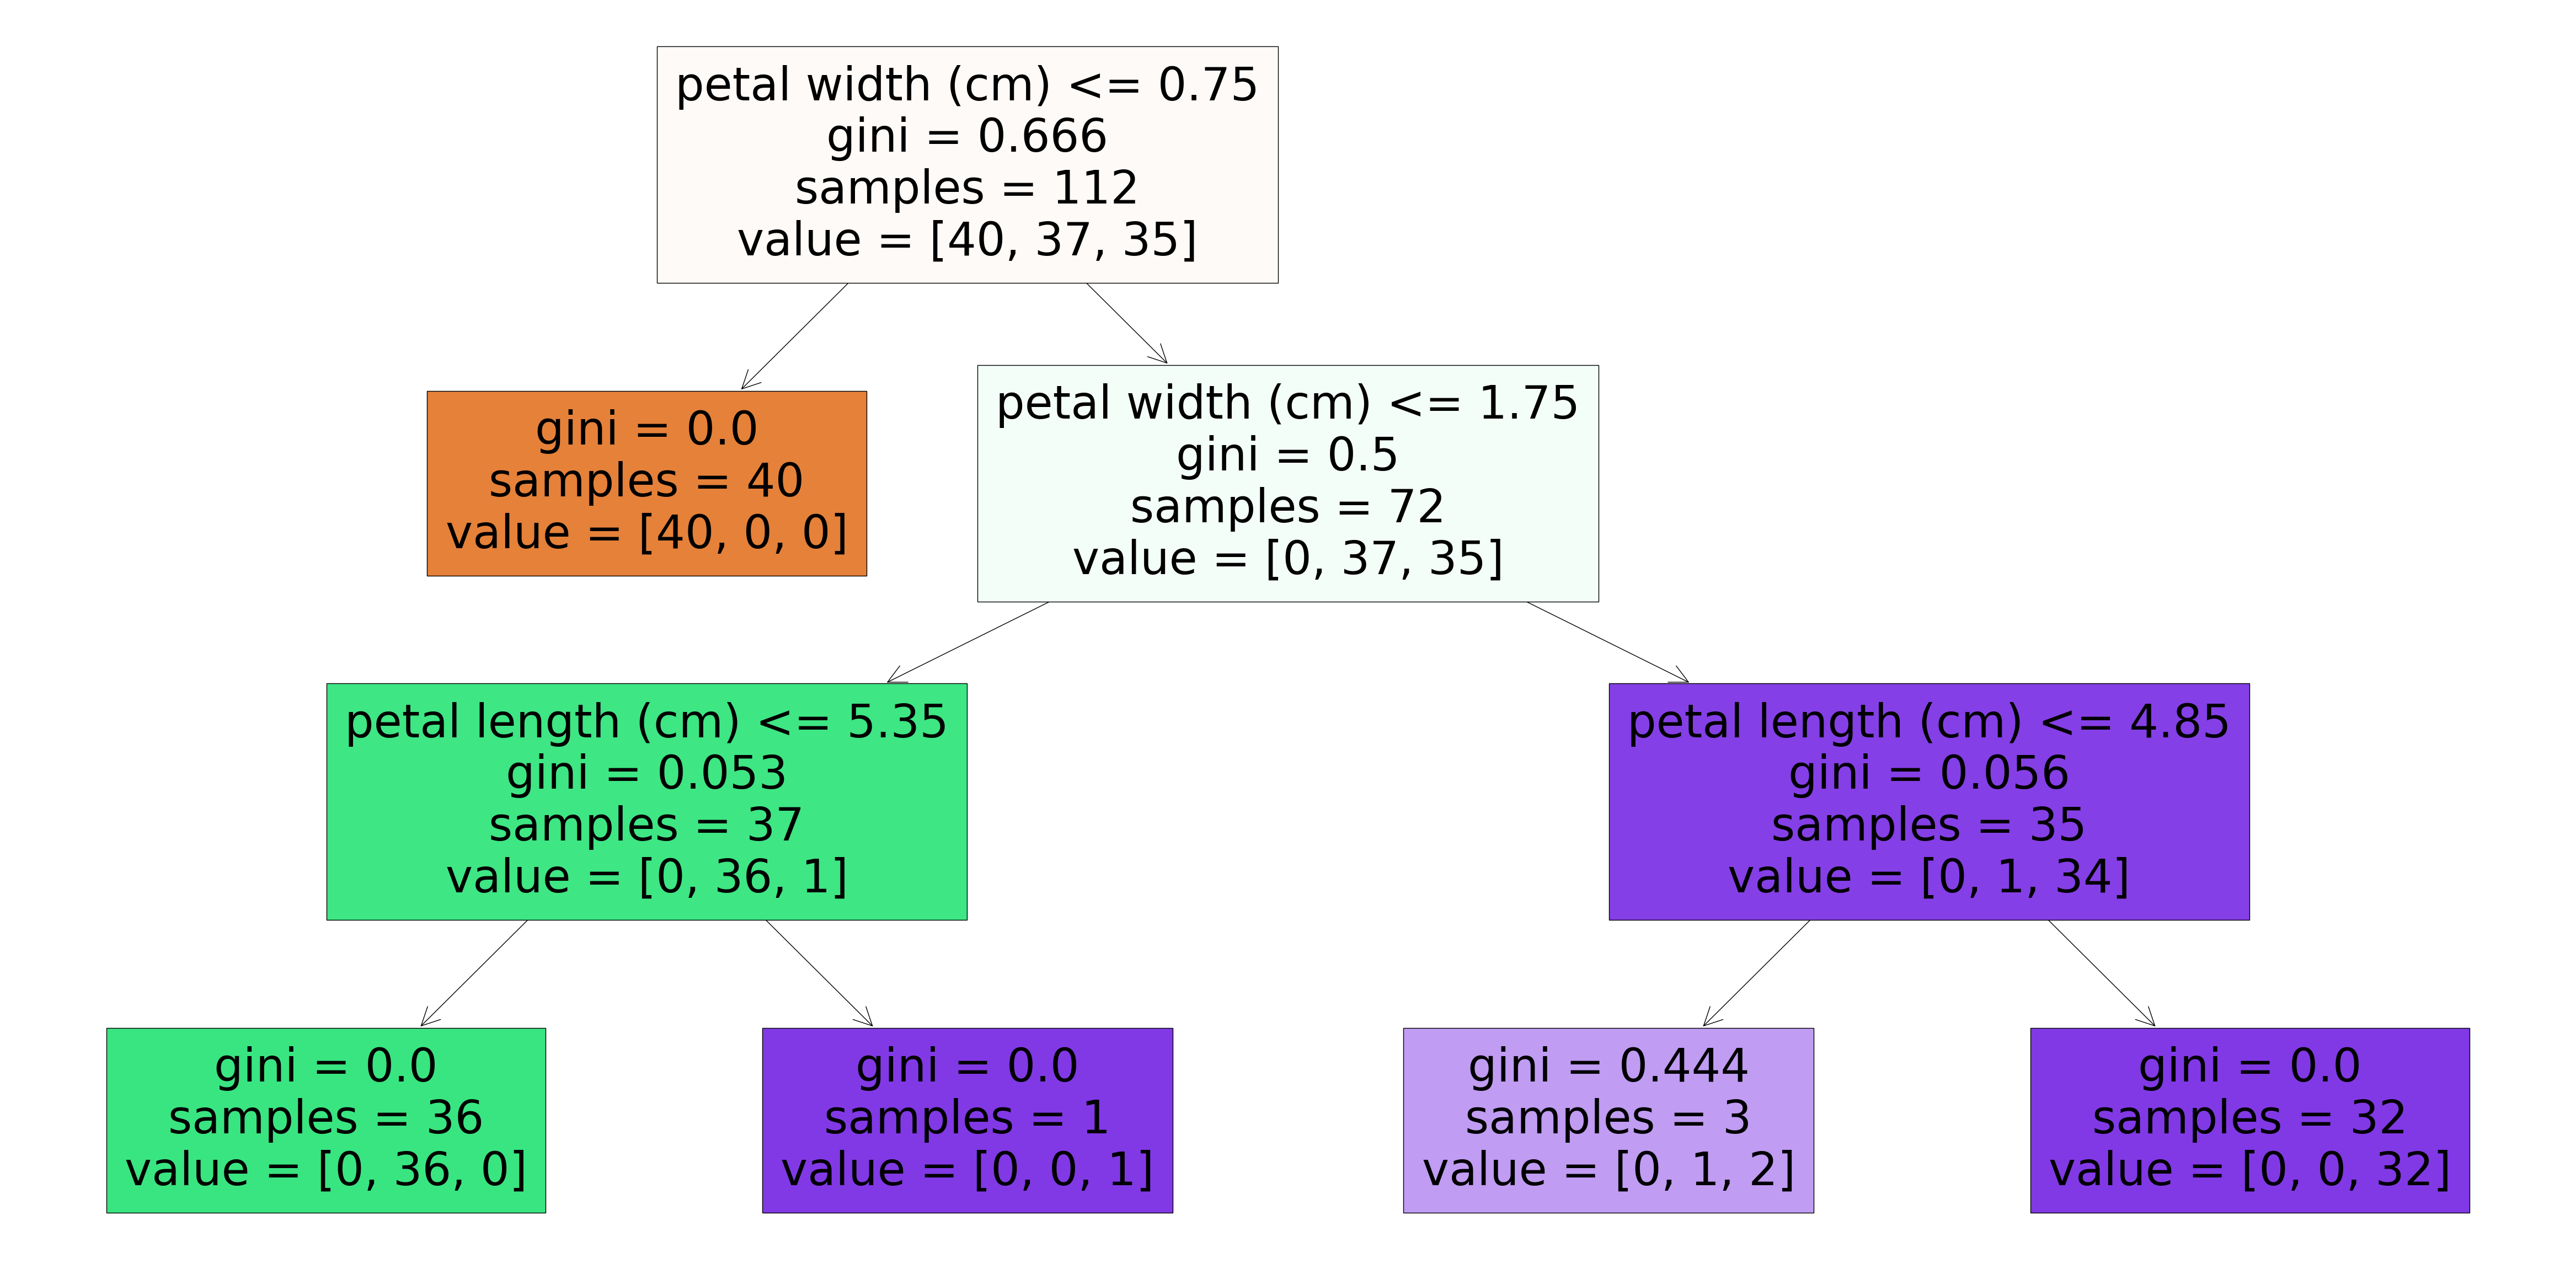

In [75]:
plt.figure(figsize=(60,30))
plot_tree(DT,max_depth=3, filled=True, feature_names=iris.feature_names)

In [76]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [77]:
DT.feature_importances_

array([0.        , 0.        , 0.03490114, 0.96509886])

In [78]:
DT2=DecisionTreeClassifier(max_depth=2)
DT3=DecisionTreeClassifier(max_depth=5)

In [79]:
DT2.fit(train_input,train_output)
DT3.fit(train_input,train_output)

DecisionTreeClassifier(max_depth=5)

In [80]:
DT2.score(test_input,test_output), DT3.score(test_input,test_output)

(0.8947368421052632, 0.9210526315789473)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [40, 37, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 72\nvalue = [0, 37, 35]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

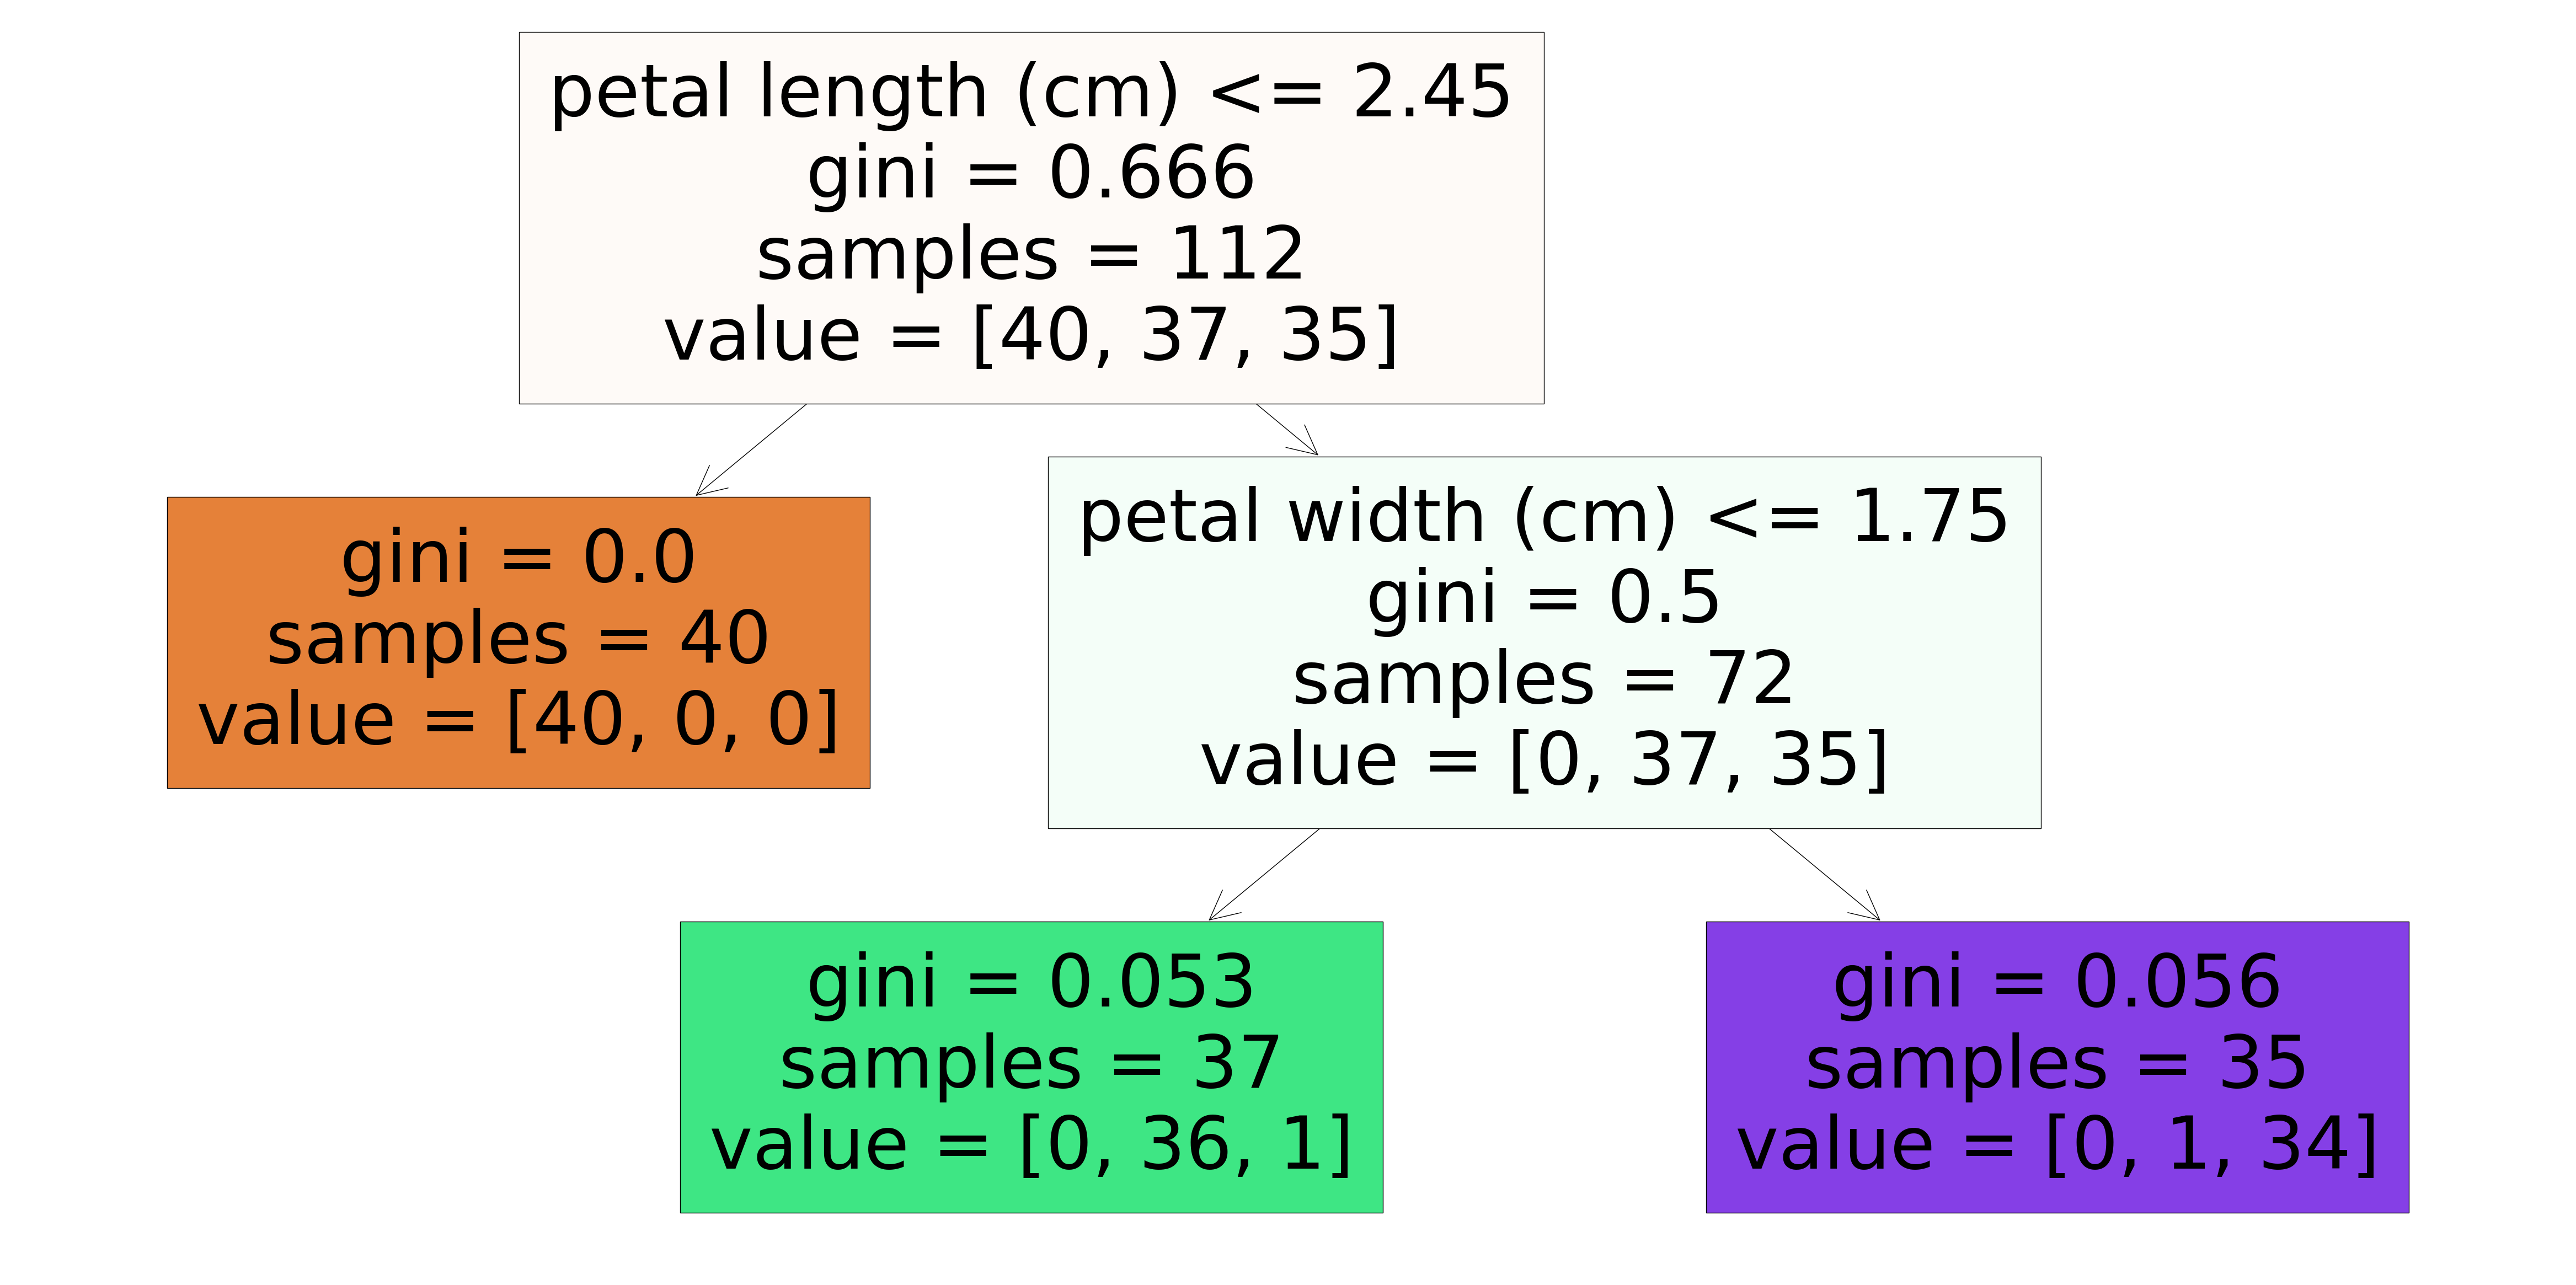

In [81]:
plt.figure(figsize=(60,30))
plot_tree(DT2,max_depth=3, filled=True, feature_names=iris.feature_names)

[Text(0.375, 0.9, 'petal width (cm) <= 0.75\ngini = 0.666\nsamples = 112\nvalue = [40, 37, 35]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.7, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 72\nvalue = [0, 37, 35]'),
 Text(0.25, 0.5, 'petal length (cm) <= 5.35\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.5, 'petal length (cm) <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.625, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

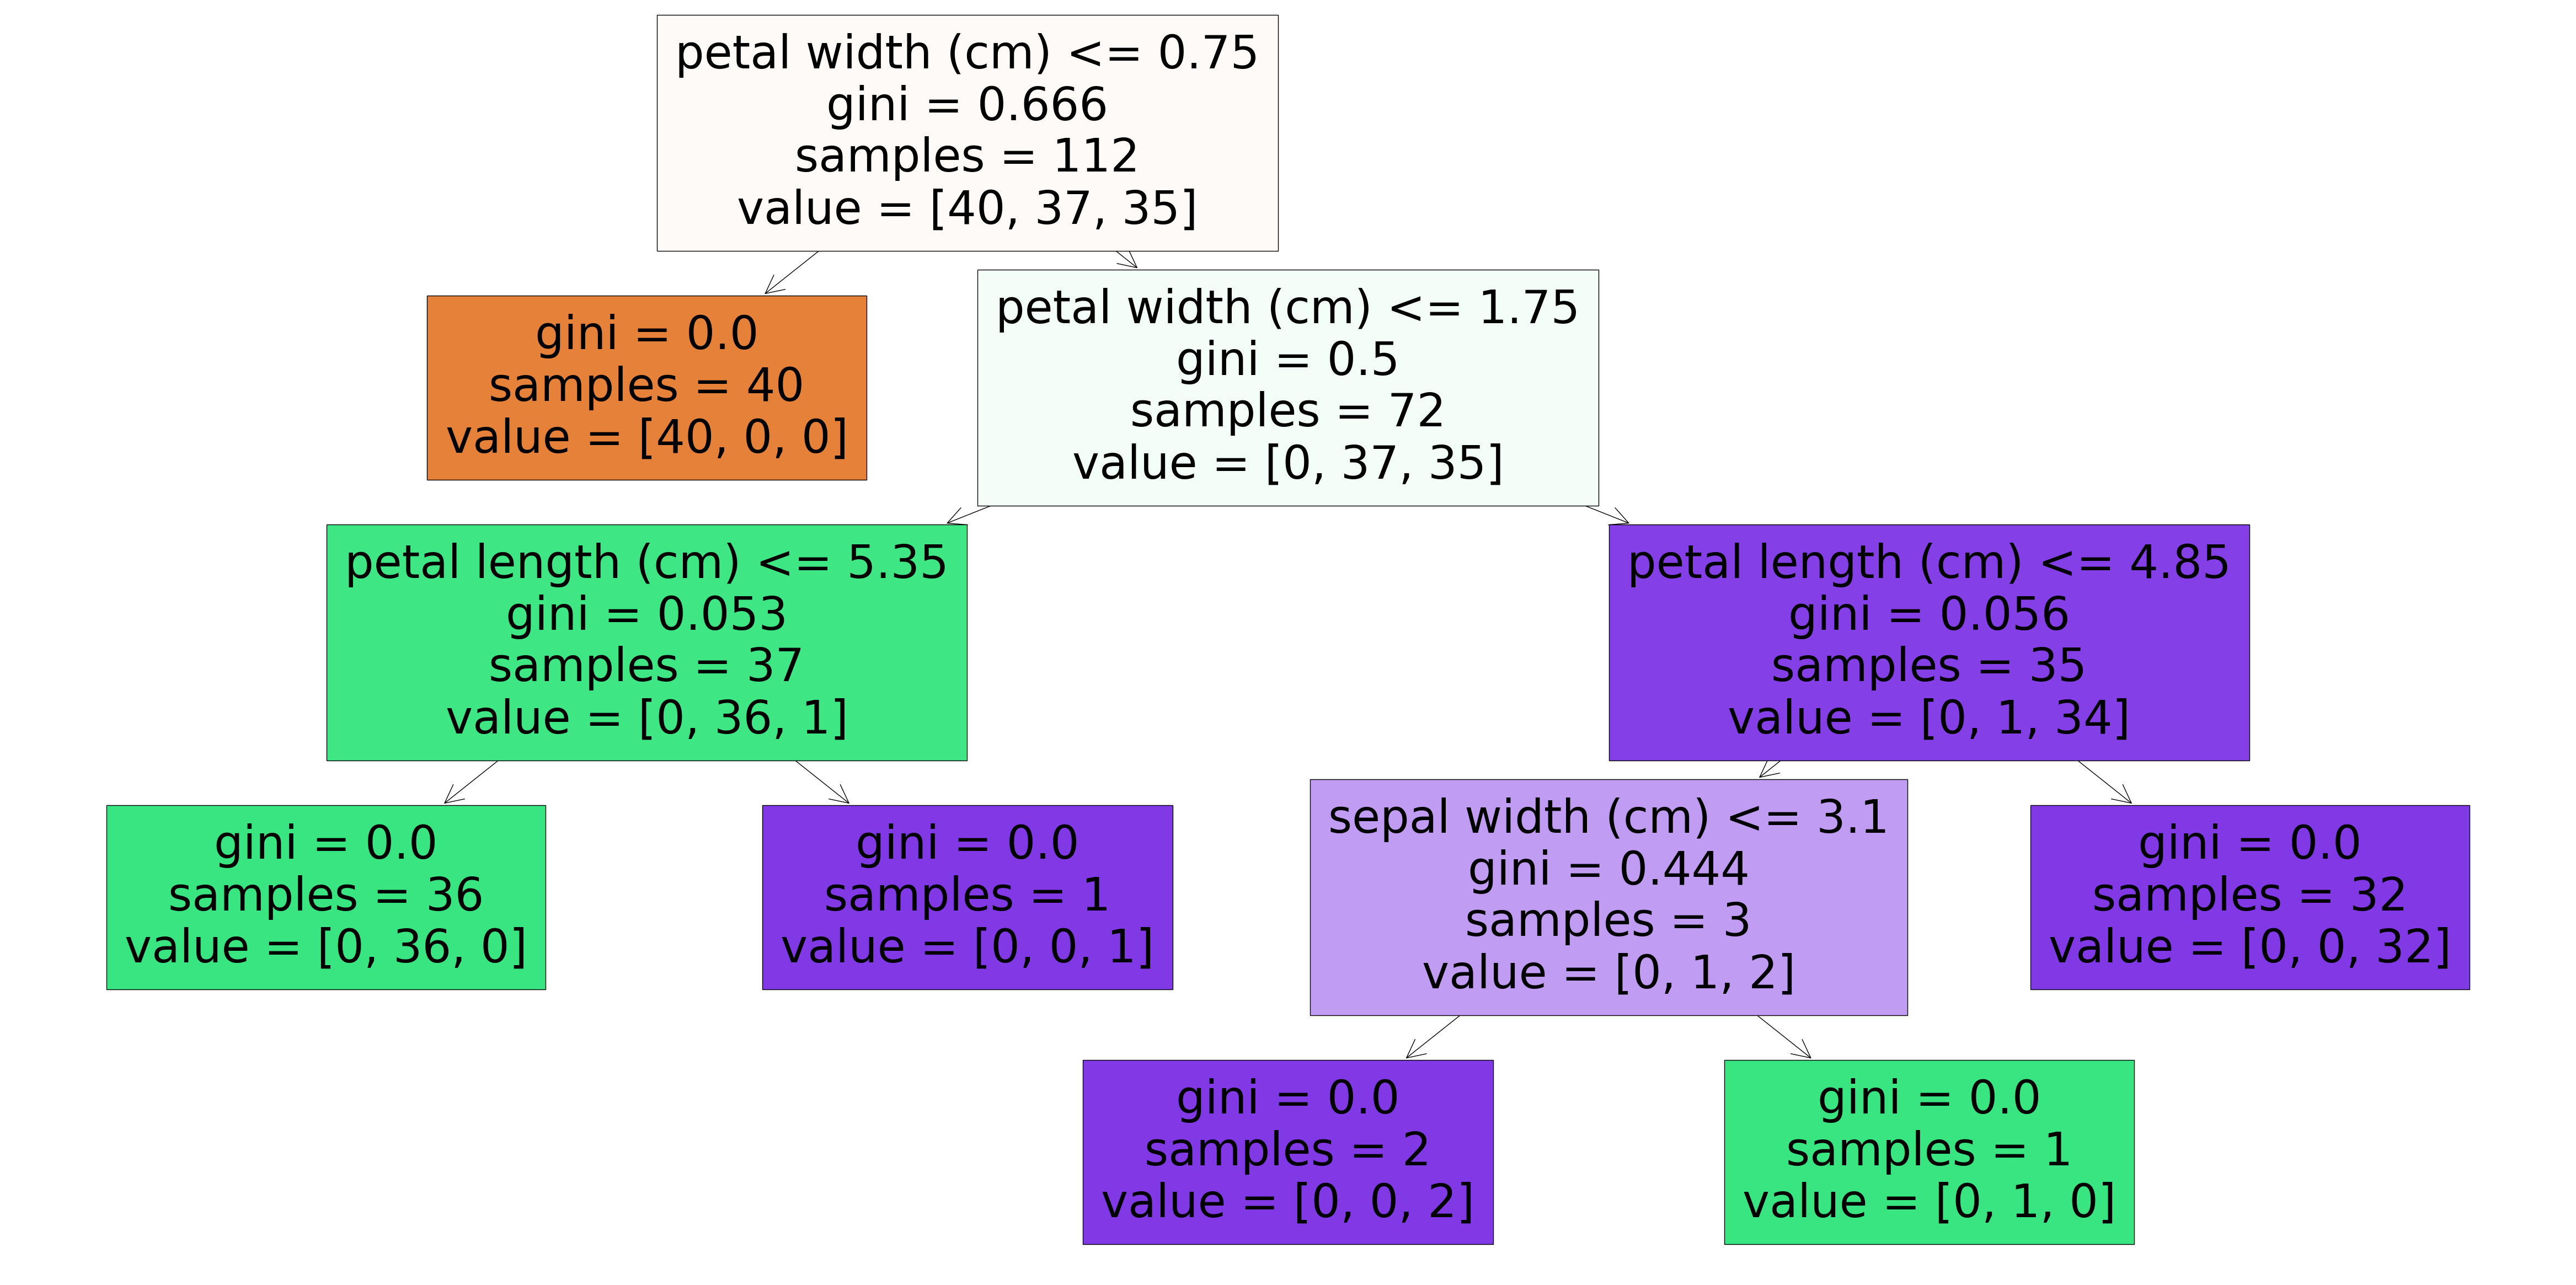

In [82]:
plt.figure(figsize=(60,30))
plot_tree(DT3,max_depth=5, filled=True, feature_names=iris.feature_names)